**Importing Dependencies**

In [1]:
import pandas as pd

**Loading the Dataset**

In [2]:
df=pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
#Finding missing values
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


Checking missing values in TotalCharges column

In [8]:
df['TotalCharges'].isnull().sum()

np.int64(0)

In [12]:
# Check if there are any non-numeric values in TotalCharges
non_numeric = df[~df['TotalCharges'].apply(pd.to_numeric, errors='coerce').notnull()]
non_numeric

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


We have found empty entries in 'Total Charges column so we replace those entries with NaN

In [11]:
# Replace empty entries in 'TotalCharges' with the median value
df['TotalCharges'] = df['TotalCharges'].replace('','NaN')  # Replace empty entries with NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)  # Fill NaN with the median

<ipython-input-11-d6c3db29be31>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)  # Fill NaN with the median


In [5]:
#Finding Duplicate values
df.duplicated().sum()

np.int64(0)

In [7]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [13]:
# Verify that the 'TotalCharges' column is now numeric
print(df['TotalCharges'].dtype)

float64


In [14]:
# Check for any missing values
print(df['TotalCharges'].isnull().sum())

0


In [23]:
df[["TotalCharges"]].head()

,TotalCharges
0,29.85
1,1889.50
2,108.15
3,1840.75
4,151.65


In [24]:
# Descriptive statistics for numerical columns
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

Overall Churn rate Distribution

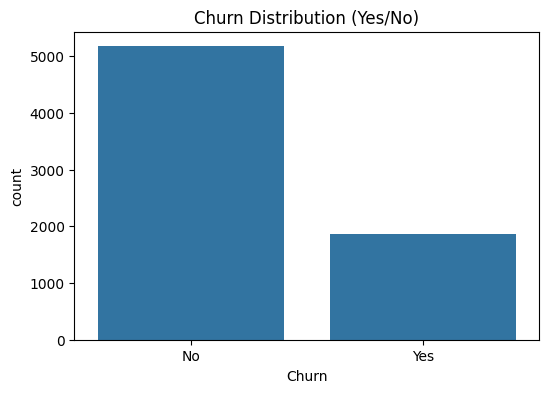

In [29]:
# Plot the churn distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution (Yes/No)')
plt.show()

We have used a count plot to show the distribution of churned vs. non-churned customers.Found that the majority of customers did not churn.

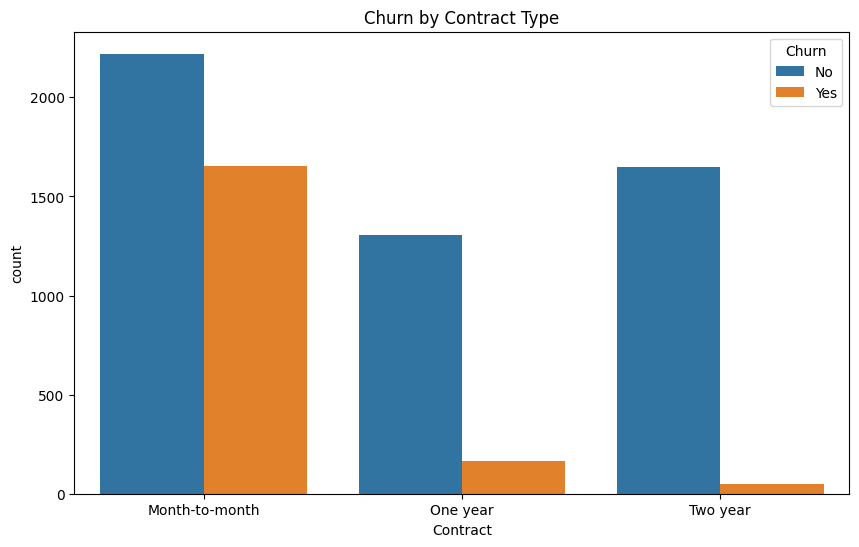

In [33]:
# Churn rate by contract type
plt.figure(figsize=(10, 6))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn by Contract Type')
plt.show()

We have used a count plot to show how churn is distributed across different contract types (e.g., Month-to-Month, One Year, Two Year).

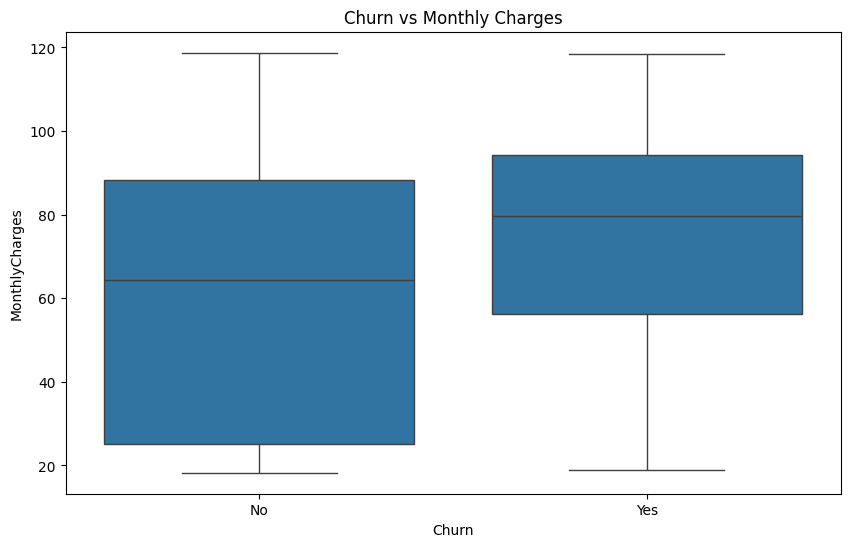

In [34]:
# Churn vs MonthlyCharges (Numerical feature)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Churn vs Monthly Charges')
plt.show()

In [43]:
# Convert Churn column to boolean (True/False)
df['Churn'] = df['Churn'].map({'Yes': True, 'No': False})

We have converted the Churn column values so that when we do queries in SQL there wont be any confusion.

In [44]:
# Export cleaned data to CSV
df.to_csv('cleaned_customer_churn_data.csv', index=False)

We are explorting this cleaned data for further analysis and creating a dashboard uisng SQL and POWER BI

**Conclusion:**

In this Customer Churn Analysis project, I have performed an in-depth exploratory analysis of a telecom company's customer data to understand the factors influencing customer churn.

The primary focus was on preparing the data for further analysis, visualizing churn patterns, and uncovering potential insights that could be useful for future business strategies.


*Key Steps Taken:*

**1.Data Preprocessing:** The dataset was thoroughly cleaned by handling missing values, converting columns to appropriate data types (e.g., converting TotalCharges to numeric and Churn to boolean), and ensuring there were no duplicates in the data.

**2.Exploratory Data Analysis (EDA):** Various visualizations were created to gain insights into the distribution of churned vs. non-churned customers:

**a) Churn Distribution:** The majority of customers in the dataset have not churned, with only a small percentage of customers leaving the service.

**b) Churn by Contract Type:** A detailed analysis of churn based on contract type revealed that the churn rate varies across different contract lengths, offering a glimpse into which contract types are more prone to churn.

**c) Churn vs Monthly Charges:** The analysis of MonthlyCharges showed how the distribution of monthly payments differs between churned and non-churned customers, highlighting the potential relationship between pricing and customer retention.

**Key Insights:**

* High retention rates were observed, with most customers staying with the telecom service.

* Customers with certain contract types and monthly charges showed more significant churn, suggesting that these factors could play a crucial role in predicting customer retention.

* The project provides valuable insights for business stakeholders, offering areas of focus such as pricing strategies, customer service, and contract management to reduce churn.

* This analysis can serve as a foundation for building a predictive model to forecast customer churn in the future. Further steps can include exploring additional features, improving feature engineering, and applying machine learning techniques to predict churn with greater accuracy.

* This concludes the analysis for now. The insights gathered could be beneficial for making data-driven decisions to improve customer retention and optimize business strategies.